In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [2]:
train=pd.read_csv(r'C:\Users\hp\Desktop\Winter_22\ml\datasets\_sentiment_Analysis_train.tsv\train.tsv',sep='\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
test=pd.read_csv(r'C:\Users\hp\Desktop\Winter_22\ml\datasets\Sentiment_analysis_test.tsv\test.tsv',sep='\t')
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [6]:
train.shape,test.shape

((156060, 4), (66292, 3))

In [7]:
train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

<IPython.core.display.Javascript object>


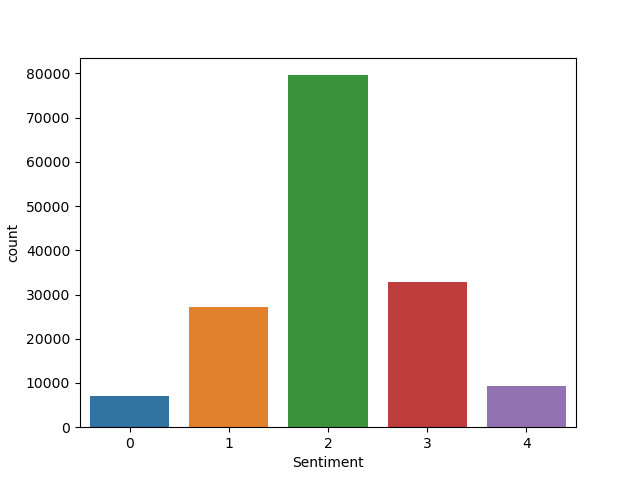

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

In [8]:
sns.countplot(data=train,x='Sentiment')

In [9]:
train.isna().any()

PhraseId      False
SentenceId    False
Phrase        False
Sentiment     False
dtype: bool

In [10]:
test.isna().any()

PhraseId      False
SentenceId    False
Phrase        False
dtype: bool

In [11]:
import string
from nltk.corpus import stopwords
def data_cleaning(text):
    lower=[words for words in text if words.islower()]
    lower= ' '.join(lower)
    
    nopunc=[char for char in lower if char not in string.punctuation]
    nopunc= ' '.join(nopunc)
    
    nostopwords=[word for word in nopunc.split() if word.lower not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords) 
    
    return nostopwords

In [12]:
from sklearn.model_selection import train_test_split
X=train['Phrase']
y=train['Sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [13]:
X_train.shape,X_test.shape

((117045,), (39015,))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=data_cleaning)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])
type(pipelineRFC)
pipelineRFC

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function data_cleaning at 0x0000024CC250A430>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [16]:
pipelineRFC.fit(X_train,y_train)
print('progressing....')

progressing....


In [23]:
pred=pipelineRFC.predict(X_test)

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.45      0.19      0.27      1770
           1       0.52      0.27      0.35      6897
           2       0.62      0.89      0.73     19744
           3       0.52      0.32      0.40      8312
           4       0.51      0.22      0.31      2292

    accuracy                           0.59     39015
   macro avg       0.52      0.38      0.41     39015
weighted avg       0.56      0.59      0.55     39015



In [29]:
predicted=pipelineRFC.predict(test.Phrase)
submission_df=pd.DataFrame(columns=['PhraseId','Sentiment'])
submission_df['PhraseId']=test.PhraseId
submission_df['Sentiment']=pd.Series(predicted)
submission_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

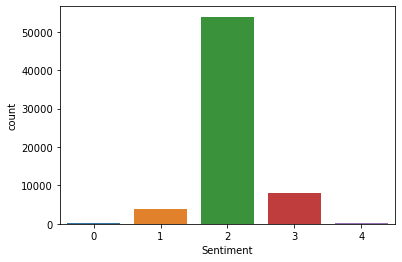

In [37]:
sns.countplot(data=submission_df, x='Sentiment')

In [31]:
subfile = 'RT Movie Review Predictions.csv'
submission_df.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: RT Movie Review Predictions.csv


https://stackoverflow.com/questions/68284264/does-the-pipeline-object-in-sklearn-transform-the-test-data-when-using-the-pred